# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single DataFrame
combined_studies = pd.merge(study_results, mouse_metadata, on= "Mouse ID",how= "left")

# Display the data table for preview
combined_studies.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mice_count= combined_studies["Mouse ID"].nunique()
mice_count

249

In [4]:
 
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicates = combined_studies[combined_studies.duplicated(["Mouse ID", "Timepoint"], keep=False)]
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = duplicates["Mouse ID"].unique()
duplicate_mouse_ids


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_studies[~combined_studies['Mouse ID'].isin(duplicate_mouse_ids)]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = clean_df["Mouse ID"].nunique()
new_mice_count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_regimen=clean_df.groupby("Drug Regimen")
# Assemble the resulting series into a single summary DataFrame.
summary_stats= pd.DataFrame({
        "Mean Tumor Volume": drug_regimen["Tumor Volume (mm3)"].mean(),
        "Median Tumor Volume": drug_regimen["Tumor Volume (mm3)"].median(),
        "Tumor Volume Variance": drug_regimen["Tumor Volume (mm3)"].var(),
        "Tumor Volume Std. Dev.": drug_regimen["Tumor Volume (mm3)"].std(),
        "Tumor Volume Std. Err.": drug_regimen["Tumor Volume (mm3)"].sem()
})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

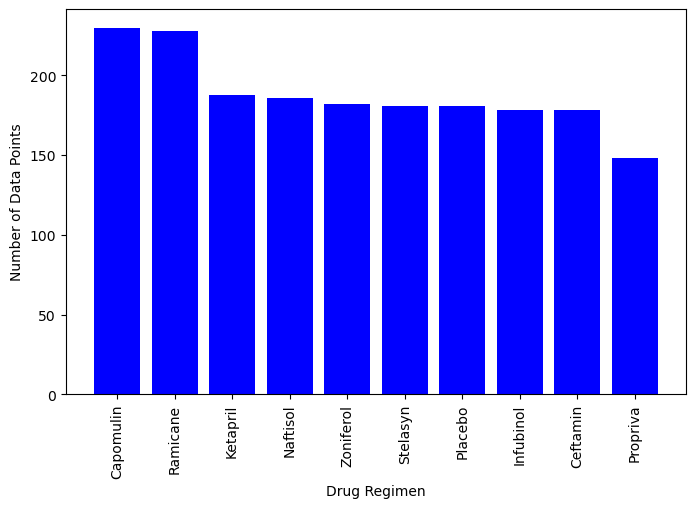

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_df['Drug Regimen'].value_counts()
plt.figure(figsize=(8,5))
plt.bar(regimen_counts.index, regimen_counts.values, color='b')
plt.xticks(rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()

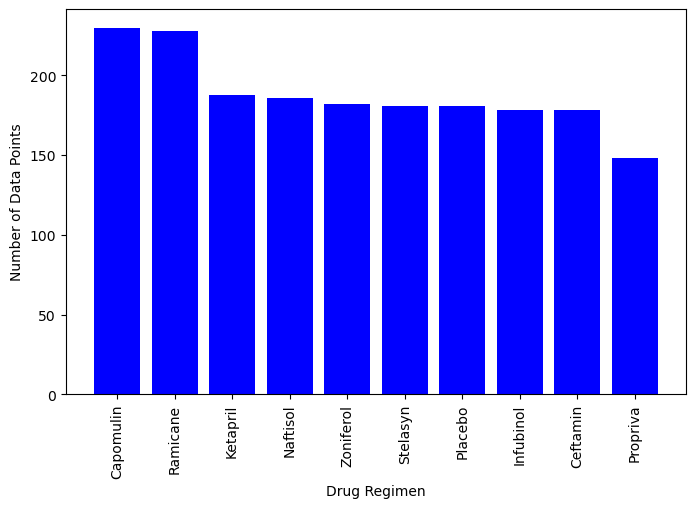

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = clean_df['Drug Regimen'].value_counts()
plt.figure(figsize=(8,5))
plt.bar(regimen_counts.index, regimen_counts.values, color='b')
plt.xticks(rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()

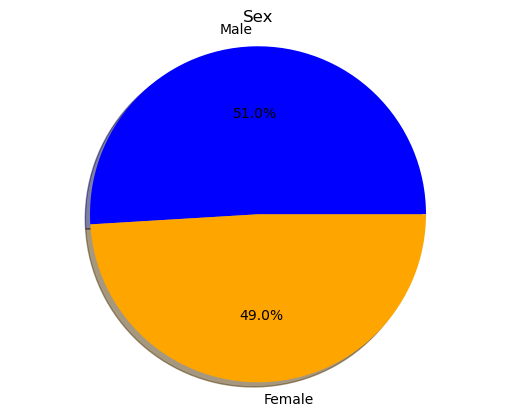

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = clean_df["Sex"].value_counts()
labels = "Male","Female"
sizes = sex_counts.values
colors= ("blue", "orange")
explode= (0,0)
plt.title("Sex")
plt.pie(sizes,explode=explode, labels = labels, colors=colors,
    autopct = "%1.1f%%", shadow=True, startangle=0)
plt.axis("equal")
plt.show()

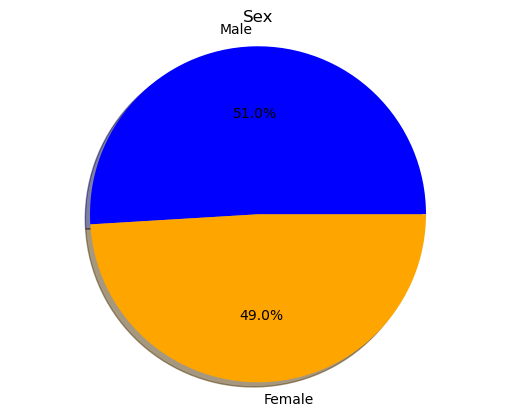

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = clean_df["Sex"].value_counts()
labels = "Male","Female"
sizes = sex_counts.values
colors= ("blue", "orange")
explode= (0,0)
plt.title("Sex")
plt.pie(sizes,explode=explode, labels = labels, colors=colors,
    autopct = "%1.1f%%", shadow=True, startangle=0)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
specific_treatments = clean_df[clean_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = specific_treatments.groupby('Mouse ID')['Timepoint'].max().reset_index()



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_volume_df = pd.merge(max_timepoint, clean_df, on=['Mouse ID', 'Timepoint'], how='left')
final_volume_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []
outliers = {}

for drug in treatments:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_volumes = final_volume_df[final_volume_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    tumor_volume.append(final_volumes)
    # add subset 
    quartiles = final_volumes.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers[drug] = final_volumes[(final_volumes < lower_bound) | (final_volumes > upper_bound)]

    print(f"{drug} IQR data:")
    print(f"Lower Quartile: {lowerq}")
    print(f"Upper Quartile: {upperq}")
    print(f"IQR: {iqr}")
    print(f"Values below {lower_bound} and above {upper_bound} could be outliers.")
    if not outliers[drug].empty:
        print(f"Potential Outliers: {outliers[drug]}\n")
    else:
        print("No potential outliers found.\n")

Capomulin IQR data:
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
IQR: 7.781863460000004
Values below 20.70456164999999 and above 51.83201549 could be outliers.
No potential outliers found.

Ramicane IQR data:
Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
IQR: 9.098536719999998
Values below 17.912664470000003 and above 54.30681135 could be outliers.
No potential outliers found.

Infubinol IQR data:
Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
IQR: 11.477135160000003
Values below 36.83290494999999 and above 82.74144559000001 could be outliers.
Potential Outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin IQR data:
Lower Quartile: 48.72207785
Upper Quartile: 64.29983003
IQR: 15.577752179999997
Values below 25.355449580000002 and above 87.66645829999999 could be outliers.
No potential outliers found.



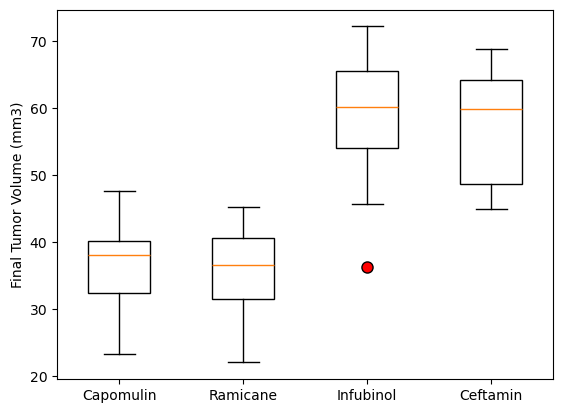

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume, 
            labels=treatments, widths=0.5, patch_artist=True, boxprops=dict(facecolor="white"),
            flierprops=dict(marker="o", color="red", markerfacecolor="red",markersize=8))
plt.ylabel("Final Tumor Volume (mm3)")


plt.show()

## Line and Scatter Plots

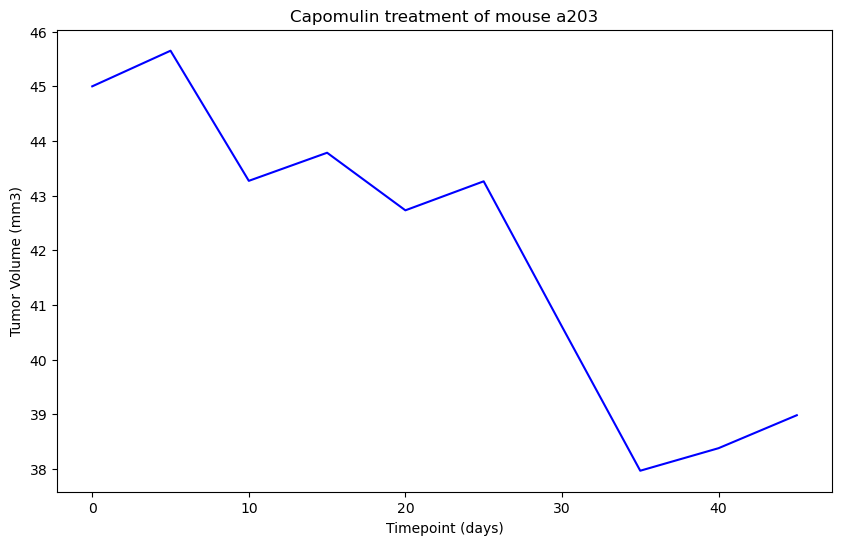

In [22]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_df[clean_df["Drug Regimen"] == "Capomulin"]
mouse = capomulin_data[capomulin_data["Mouse ID"] == "b128"]
mouse=mouse.sort_values("Timepoint")
plt.figure(figsize=(10,6))
plt.plot(mouse["Timepoint"],mouse["Tumor Volume (mm3)"],
        color="b",label="Tumor Volume")
plt.title("Capomulin treatment of mouse a203")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

In [40]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


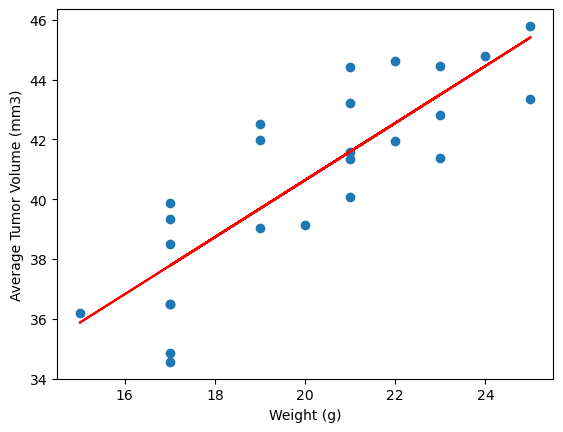

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
